In [8]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from jcm_lib import fases

#DEFINIMOS LOS OPERADORES QUE VAMOS A USAR EN LOS CALCULOS
n=tensor(qeye(2),qeye(2),num(3))
sqrtN=tensor(qeye(2),qeye(2),Qobj(np.diag([0,1,np.sqrt(2)])))
n2=tensor(qeye(2),qeye(2),Qobj(np.diag([0,1,4])))
a=tensor(qeye(2),qeye(2),destroy(3))
sm1=tensor(sigmam(),qeye(2),qeye(3))
sp1=tensor(sigmap(),qeye(2),qeye(3))
sz1=tensor(sigmaz(),qeye(2),qeye(3))
sx1=tensor(sigmax(),qeye(2),qeye(3))
sm2=tensor(qeye(2),sigmam(),qeye(3))
sp2=tensor(qeye(2),sigmap(),qeye(3))
sz2=tensor(qeye(2),sigmaz(),qeye(3))
sx2=tensor(qeye(2),sigmax(),qeye(3))

#DEFINIMOS LOS VECTORES DE LA BASE
e=basis(2,0)
gr=basis(2,1)

ee0=tensor(e,e,basis(3,0)) #0
ee1=tensor(e,e,basis(3,1)) #1
ee2=tensor(e,e,basis(3,2)) #2

eg0=tensor(e,gr,basis(3,0)) #3
ge0=tensor(gr,e,basis(3,0)) #6

eg1=tensor(e,gr,basis(3,1)) #4
ge1=tensor(gr,e,basis(3,1)) #7

eg2=tensor(e,gr,basis(3,2)) #5
ge2=tensor(gr,e,basis(3,2)) #8

gg0=tensor(gr,gr,basis(3,0)) #9
gg1=tensor(gr,gr,basis(3,1)) #10
gg2=tensor(gr,gr,basis(3,2)) #11

# from mpl_toolkits.mplot3d import axes3d


SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure.subplot',left=0.14)
plt.rc('figure.subplot',bottom=0.11)
plt.rc('figure.subplot',right=0.962)
plt.rc('figure.subplot',top=0.95)
plt.rc('figure.subplot',wspace=0.07)

In [9]:
acoplamiento='lineal'
if acoplamiento=='lineal':
    acop=1/2
elif acoplamiento=='bs':
    acop=1
else:
    print(f"Acoplamietno tiene que ser lineal o bs pero es {acoplamiento}")
    exit()

def beta_n(n_:int,k:float,J:float,x:float):
    return -(x*(n_**2+(n_-1)**2+(n_-2)**2)+J+2*k)

def gamma_n(n_:int,d:float,g:float,k:float,J:float,x:float,a:float=acop):
    return (x*(n_-1)**2-J+2*k)*(x*(n_-2)**2+x*n_**2+2*J)+(x*(n_-2)**2+d+J)*(x*n_**2-d+J)-2*g**2*(n_**(2*a)+(n_-1)**(2*a))

def eta_n(n_:int,d:float,g:float,k:float,J:float,x:float,a:float=acop):
    return -(x*n_**2 - d + J)*(x*(n_ - 2)**2 + d + J)*(x*(n_ - 1)**2 - J + 2*k)+ 2*g**2*(x*(n_ - 2)**2*n_**(2*a) + x*n_**2*(n_ - 1)**(2*a) + d* (n_**(2*a) - (n_ - 1)**(2*a)) + J*(n_**(2*a) - (n_ - 1)**(2*a)))

def Q_n(n_:int,d:float,g:float,k:float,J:float,x:float):
    return gamma_n(n_,d,g,k,J,x)/3-beta_n(n_,k,J,x)*beta_n(n_,k,J,x)/9

def R_n(n_:int,d:float,g:float,k:float,J:float,x:float):
    return 1/54*(9*beta_n(n_,k,J,x)*gamma_n(n_,d,g,k,J,x)-27*eta_n(n_,d,g,k,J,x)-2*beta_n(n_,k,J,x)*beta_n(n_,k,J,x)*beta_n(n_,k,J,x))

def theta_n(n_:int,d:float,g:float,k:float,J:float,x:float):
    return np.arccos(R_n(n_,d,g,k,J,x)/np.sqrt(-Q_n(n_,d,g,k,J,x)**3))

def omega_general(n_:int,j:int,d:float,g:float,k:float,J:float,x:float):
    return 2*np.sqrt(-Q_n(n_,d,g,k,J,x))*np.cos((theta_n(n_,d,g,k,J,x)+2*(j-1)*np.pi)/3)

def rabi_freq(n_:int,j1:int,j2:int,d:float,g:float,k:float,J:float,x:float):
    return omega_general(n_,j2,d,g,k,J,x)-omega_general(n_,j1,d,g,k,J,x)

<>:52: SyntaxWarning: invalid escape sequence '\d'
<>:53: SyntaxWarning: invalid escape sequence '\D'
<>:52: SyntaxWarning: invalid escape sequence '\d'
<>:53: SyntaxWarning: invalid escape sequence '\D'
C:\Users\juego\AppData\Local\Temp\ipykernel_6556\720860349.py:52: SyntaxWarning: invalid escape sequence '\d'
  ax_fg.set_ylabel('$\delta\phi/\pi$',size=20)
C:\Users\juego\AppData\Local\Temp\ipykernel_6556\720860349.py:53: SyntaxWarning: invalid escape sequence '\D'
  ax_fg.set_xlabel('$\Delta/g$',size=20)


(-25.0, 25.0)

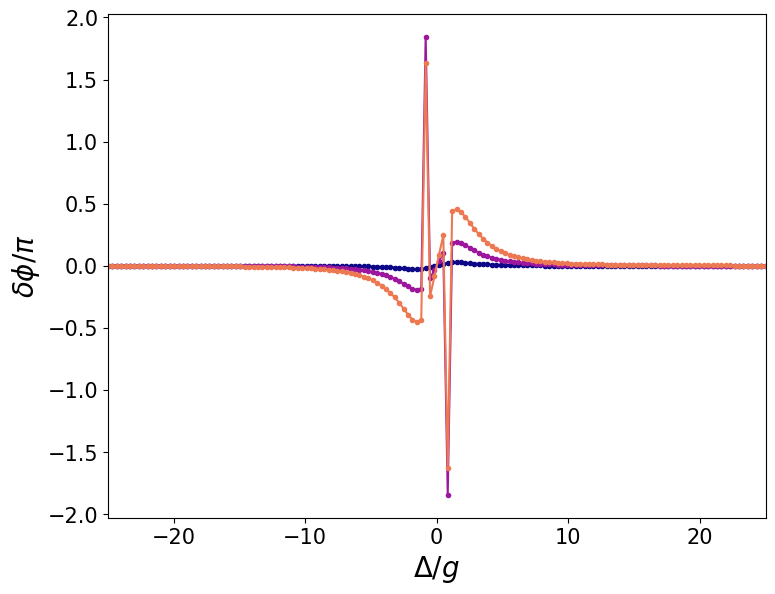

In [11]:
w_0=1
g=0.001*w_0
p=0.005*g

x=0

k=0
J=0

def f():
    if acoplamiento=='lineal':
        return 1
    elif acoplamiento=='bs':
        return sqrtN

def pr(estado):
    return estado.unit()*estado.unit().dag()


fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
delta_list=np.linspace(-25*g,25*g,150)

for j,gamma in enumerate([0.01*g,0.1*g,0.25*g]):

    colors=mpl.colormaps['plasma'](np.linspace(0,1,3+1))
    deltafg=np.zeros(len(delta_list))
    for i,delta in enumerate(delta_list):

        
        '''---Hamiltoniano---'''

        H=x*n2 + delta/2*(sz1+sz2) + g*((sm1+sm2)*f()*a.dag()+(sp1+sp2)*a*f()) + 2*k*(sm1*sp2+sp1*sm2) + J*sz1*sz2
            
        '''---Simulacion numerica---'''
        T=2*np.pi/np.abs(rabi_freq(2,1,2,delta,g,k,J,x))
        t_final=3*T
        steps=10000

        psi0=(eg1+ge1).unit()
        l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*(sp1+sp2)]
        t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
        sol_u=mesolve(H,psi0,t,c_ops=[])
        sol_d=mesolve(H,psi0,t,c_ops=l_ops)
        fg_u,arg,eigenvals_t_u = fases(sol_u)
        fg_d,arg,eigenvals_t_d = fases(sol_d)

        deltafg[i]=fg_d[-1]-fg_u[-1]

    ax_fg.plot(delta_list/g,deltafg/np.pi,color=colors[j],marker='.')

ax_fg.set_ylabel('$\delta\phi/\pi$',size=20)
ax_fg.set_xlabel('$\Delta/g$',size=20)
ax_fg.set_xlim(delta_list[0]/g,delta_list[-1]/g)

In [ ]:
w_0=1
g=0.001*w_0
p=0.005*g

x=0

k=0
J=0

def f():
    if acoplamiento=='lineal':
        return 1
    elif acoplamiento=='bs':
        return sqrtN

def pr(estado):
    return estado.unit()*estado.unit().dag()


fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
delta_list=np.linspace(-10*g,10*g,100)

for j,gamma in enumerate([0.01*g,0.1*g,0.25*g]):

    colors=mpl.colormaps['plasma'](np.linspace(0,1,3+1))
    deltafg=np.zeros(len(delta_list))
    for i,delta in enumerate(delta_list):

        
        '''---Hamiltoniano---'''

        H=x*n2 + delta/2*(sz1+sz2) + g*((sm1+sm2)*f()*a.dag()+(sp1+sp2)*a*f()) + 2*k*(sm1*sp2+sp1*sm2) + J*sz1*sz2
            
        '''---Simulacion numerica---'''
        T=2*np.pi/np.abs(rabi_freq(2,1,2,delta,g,k,J,x))
        t_final=3*T
        steps=10000

        psi0=(eg1+ge1).unit()
        l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*(sp1+sp2)]
        t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
        sol_u=mesolve(H,psi0,t,c_ops=[])
        sol_d=mesolve(H,psi0,t,c_ops=l_ops)
        fg_u,arg,eigenvals_t_u = fases(sol_u)
        fg_d,arg,eigenvals_t_d = fases(sol_d)

        deltafg[i]=fg_d[-1]-fg_u[-1]

    ax_fg.plot(delta_list/g,deltafg/np.pi,color=colors[j],marker='.')

ax_fg.set_ylabel('$\delta\phi/\pi$',size=20)
ax_fg.set_xlabel('$\Delta/g$',size=20)
ax_fg.set_xlim(delta_list[0]/g,delta_list[-1]/g)